In [3]:
####From SAV to LOVE

# HW №2

Используем набор примеров fashion-MNIST

Опишите - какой результата получен в нейросети в зависимости от:

числа нейронов в слое(для 2-хслойной сети),
числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
фиксируйте для тренировочного и тестового набора метрики accuracy.
Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Concatenate 
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from __future__ import absolute_import, division, print_function, unicode_literals
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.utils import plot_model
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(tf.__version__)

2.4.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

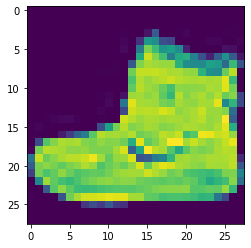

In [7]:
plt.imshow(train_images[0,:,:])
plt.show()

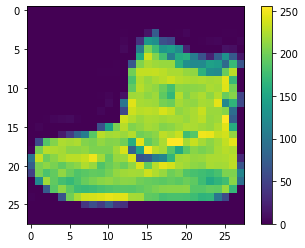

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

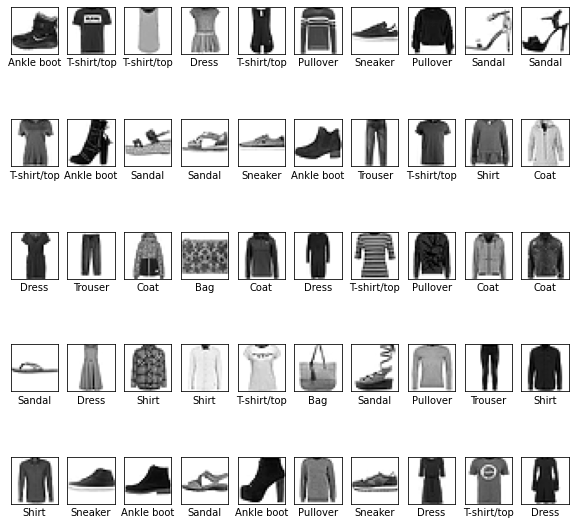

In [14]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [16]:
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
import tensorflow

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
inputs = Input(shape=(28, 28))
x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs,outputs)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.fit(train_images, y_train_labels, epochs=3, batch_size=100)

Epoch 1/3
600/600 [==============================] - 3s 3ms/step - loss: 0.7209 - accuracy: 0.7546
Epoch 2/3
600/600 [==============================] - 2s 3ms/step - loss: 0.4113 - accuracy: 0.8556
Epoch 3/3
600/600 [==============================] - 2s 3ms/step - loss: 0.3735 - accuracy: 0.8680


In [22]:
test_loss, test_acc = model.evaluate(test_images,  y_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3860 - accuracy: 0.8632

Test accuracy: 0.8632000088691711


## Результат когда 3 эпохи accuracy: 0.8503999710083008 и 100 батчей и 2 уровня




In [23]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)
train_images = train_images / 255.0
test_images = test_images / 255.0


In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='softmax'),
    keras.layers.Dense(10)
])

In [25]:
inputs = Input(shape=(28, 28))
x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs,outputs)

In [26]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.fit(train_images, y_train_labels, epochs=3, batch_size=100)

Epoch 1/3
600/600 [==============================] - 2s 3ms/step - loss: 0.7381 - accuracy: 0.7507
Epoch 2/3
600/600 [==============================] - 2s 3ms/step - loss: 0.4092 - accuracy: 0.8551
Epoch 3/3
600/600 [==============================] - 2s 3ms/step - loss: 0.3642 - accuracy: 0.8687


In [29]:
test_loss, test_acc = model.evaluate(test_images,  y_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3812 - accuracy: 0.8656

Test accuracy: 0.8655999898910522


## Результат когда 3 эпохи accuracy: 0.8626000285148621 и 100 батчей и 3 уровня= при увеличении кол-ва уровней качество предсказания растет

In [30]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)
train_images = train_images / 255.0
test_images = test_images / 255.0
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='softmax'),
    keras.layers.Dense(10)
])
inputs = Input(shape=(28, 28))
x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs,outputs)
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.fit(train_images, y_train_labels, epochs=20, batch_size=100)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.7171 - accuracy: 0.7558
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4040 - accuracy: 0.8594
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3670 - accuracy: 0.8686
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3380 - accuracy: 0.8786
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3099 - accuracy: 0.8873
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2975 - accuracy: 0.8911
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2848 - accuracy: 0.8970
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2753 - accuracy: 0.8991
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2640 - accuracy: 0.9045
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2475 - accuracy: 0.9094

In [32]:
test_loss, test_acc = model.evaluate(test_images,  y_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3336 - accuracy: 0.8899

Test accuracy: 0.8899000287055969


## Результат когда 20 эпох accuracy: 0.8894000053405762 и 100 батчей и 3 уровня


In [33]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)
train_images = train_images / 255.0
test_images = test_images / 255.0
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='softmax'),
    keras.layers.Dense(10)
])
inputs = Input(shape=(28, 28))
x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs,outputs)
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.fit(train_images, y_train_labels, epochs=20, batch_size=1000)

Epoch 1/20
60/60 [==============================] - 1s 12ms/step - loss: 1.2213 - accuracy: 0.5901
Epoch 2/20
60/60 [==============================] - 1s 12ms/step - loss: 0.5178 - accuracy: 0.8260
Epoch 3/20
60/60 [==============================] - 1s 12ms/step - loss: 0.4659 - accuracy: 0.8419
Epoch 4/20
60/60 [==============================] - 1s 12ms/step - loss: 0.4332 - accuracy: 0.8507
Epoch 5/20
60/60 [==============================] - 1s 12ms/step - loss: 0.4117 - accuracy: 0.8596
Epoch 6/20
60/60 [==============================] - 1s 12ms/step - loss: 0.3873 - accuracy: 0.8653
Epoch 7/20
60/60 [==============================] - 1s 12ms/step - loss: 0.3848 - accuracy: 0.8667
Epoch 8/20
60/60 [==============================] - 1s 13ms/step - loss: 0.3665 - accuracy: 0.8752
Epoch 9/20
60/60 [==============================] - 1s 12ms/step - loss: 0.3532 - accuracy: 0.8781
Epoch 10/20
60/60 [==============================] - 1s 12ms/step - loss: 0.3453 - accuracy: 0.8794
Epoch 11/

In [35]:
test_loss, test_acc = model.evaluate(test_images,  y_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3581 - accuracy: 0.8723

Test accuracy: 0.8723000288009644


## Результат когда 20 эпох accuracy: 0.8723000288009644 и 1000 батчей и 3 уровня = При увеличении батчей качество предсказания падает.


In [36]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)
train_images = train_images / 255.0
test_images = test_images / 255.0
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='softmax'),
    keras.layers.Dense(10)
])
inputs = Input(shape=(28, 28))
x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs,outputs)
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
model.fit(train_images, y_train_labels, epochs=20, batch_size=10)

Epoch 1/20
6000/6000 [==============================] - 9s 1ms/step - loss: 0.5885 - accuracy: 0.7904
Epoch 2/20
6000/6000 [==============================] - 9s 1ms/step - loss: 0.3736 - accuracy: 0.8653
Epoch 3/20
6000/6000 [==============================] - 9s 1ms/step - loss: 0.3296 - accuracy: 0.8790
Epoch 4/20
6000/6000 [==============================] - 9s 1ms/step - loss: 0.3085 - accuracy: 0.8847
Epoch 5/20
6000/6000 [==============================] - 9s 1ms/step - loss: 0.2927 - accuracy: 0.8912
Epoch 6/20
6000/6000 [==============================] - 9s 1ms/step - loss: 0.2765 - accuracy: 0.8972
Epoch 7/20
6000/6000 [==============================] - 9s 1ms/step - loss: 0.2661 - accuracy: 0.8991
Epoch 8/20
6000/6000 [==============================] - 9s 1ms/step - loss: 0.2534 - accuracy: 0.9051
Epoch 9/20
6000/6000 [==============================] - 9s 1ms/step - loss: 0.2434 - accuracy: 0.9081
Epoch 10/20
6000/6000 [==============================] - 9s 1ms/step - loss: 0.241

In [38]:
test_loss, test_acc = model.evaluate(test_images,  y_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3720 - accuracy: 0.8889

Test accuracy: 0.8888999819755554


## Результат когда 20 эпох accuracy: 0.8723000288009644 и 10 батчей и 3 уровня = При уменьшении батчей качество предсказания растет.